In [3]:
import numpy as np
from matplotlib import pyplot as plt

**Exercício 01**: A “discretização” de um sinal $x(t)$ pode fazer com que esse sinal possa não ser recuperado a partir de sua versão discretizada $x[n]$. Dessa forma, o objetivo deste exercı́cio é
visualizar que o aumento de pontos no domı́nio do tempo discreto de um sinal faz com que ele
se aproxime de sua versão contı́nua. Considere um sinal senoidal no tempo discreto e que P
seja a quantidade de amostras do sinal por perı́odo. Plote um único perı́odo da senoide com
frequência de $60$ Hz e com $P = \{3, 5, 10, 50\}$ amostras.

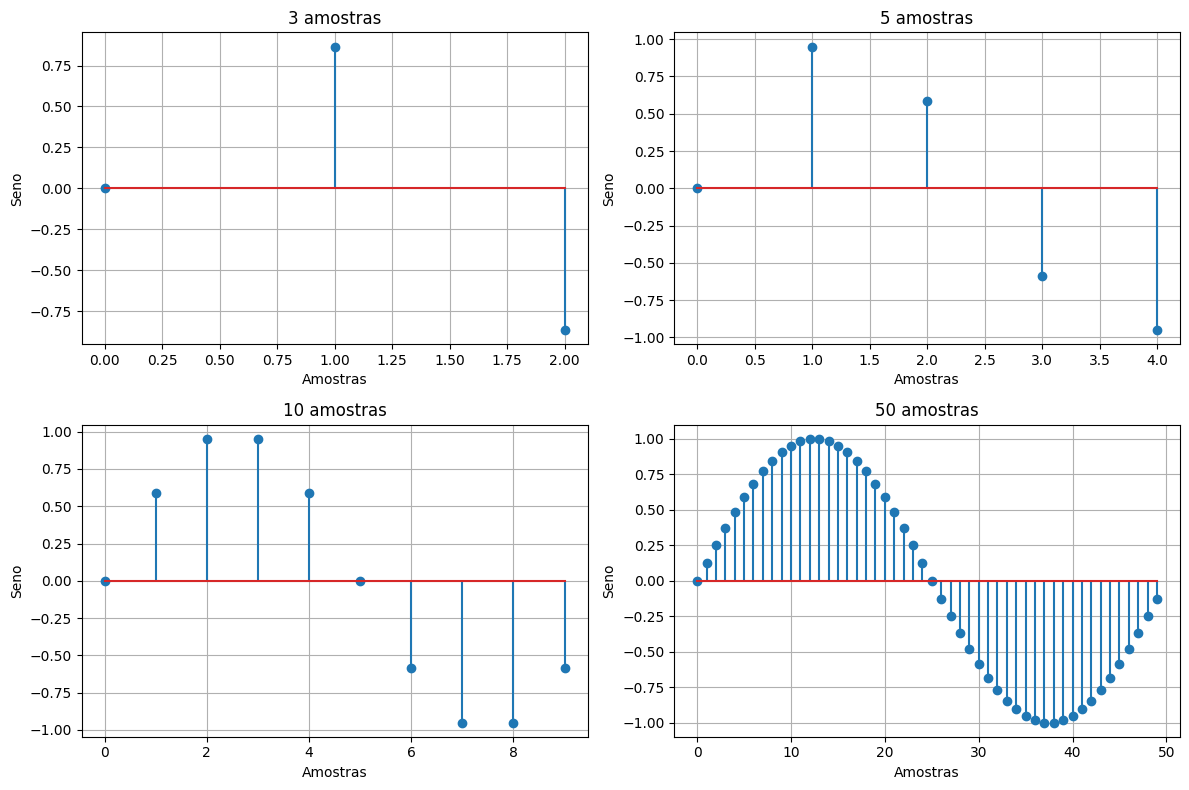

In [91]:
freq = 60 # Frequência [Hz]
ang_freq = 2*np.pi*freq # Frequência angular [rad]
period = 1 / freq # Período [s]

P = [3, 5, 10, 50] # Conjunto dos números de amostras

plt.figure(figsize=(12, 8))  # Tamanho da figura

for i, p in enumerate(P):

    samples = np.arange(0, p)  # Amostras
    t = period / p  # Divide o período entre o número de amostras
    seno = np.sin(ang_freq * t * samples)  # Calcula o valor do seno para cada amostra

    plt.subplot(2, 2, i + 1)
    plt.stem(samples, seno)
    plt.title(f"{p} amostras")
    plt.xlabel("Amostras")
    plt.ylabel("Seno")
    plt.grid()

plt.tight_layout()
plt.show()

**Exercício 02**: Seja $x[n]$ um sinal exponencial complexo de tempo discreto dado por $x[n] = Ce^{an}$. A partir desta expressão, defina as constantes $a$, $C$ de modo a obter:

1. O sinal exponencial.
2. O sinal exponencial complexo oscilatório.
3. O sinal exponencial complexo oscilatório amortecido.

Para cada caso, plote $x[n]$ e mostre o valor escolhido para $a$ e $C$, explicando porquê da escolha.

In [276]:
# Function that returns the complex exponential signal in discrete time
def exponential(C, a, samples):

  return C * np.exp(a * samples)

# Array with each n sample
samples2 = np.arange(0, 120)

# The C is the same for each case for a good comparison
C = 2 + 1j

# The values where defined by testing the better value for each case
a1 = -0.01 # Exponential signal has only the real component
a2 = 0.1j # Oscilattory signal has only the imaginary component
a3 = -0.01 + 0.1j # Dumped signal has both the real and imaginary components

exponential1 = exponential(C, a1, samples2)
exponential2 = exponential(C, a2, samples2)
exponential3 = exponential(C, a3, samples2)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


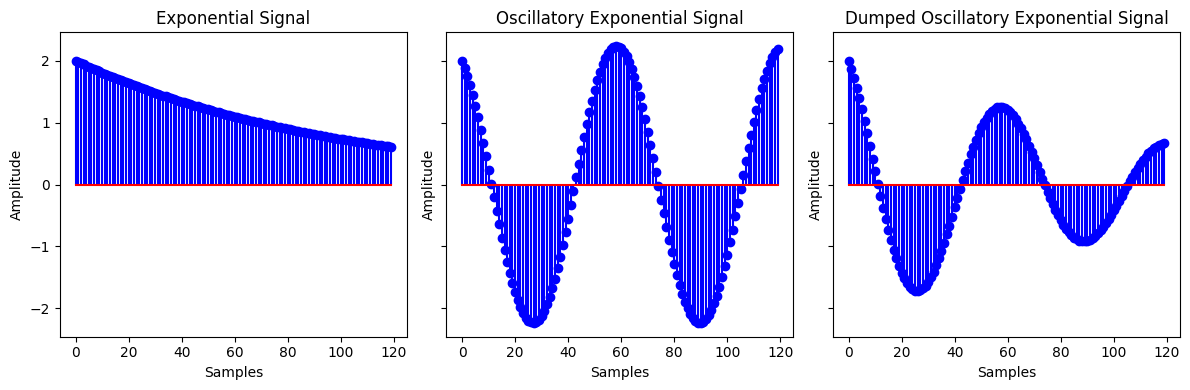

In [277]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)

axs[0].stem(samples2, exponential1, linefmt='b-', markerfmt='bo', basefmt='r-')
axs[0].set_title('Exponential Signal')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')

axs[1].stem(samples2, exponential2, linefmt='b-', markerfmt='bo', basefmt='r-')
axs[1].set_title('Oscillatory Exponential Signal')
axs[1].set_xlabel('Samples')
axs[1].set_ylabel('Amplitude')

axs[2].stem(samples2, exponential3, linefmt='b-', markerfmt='bo', basefmt='r-')
axs[2].set_title('Dumped Oscillatory Exponential Signal')
axs[2].set_xlabel('Samples')
axs[2].set_ylabel('Amplitude')

fig.tight_layout()
plt.show()

**Exercício 03**: Mostre graficamente que o aumento da frequência $ω_0$ em um sinal exponencial complexo periódico $x[n] = e^{jω_{0} n}$ não necessariamente aumenta a oscilação. Explique o motivo.
Além disso, qual a frequência que faz o sinal oscilar mais rápido?

In [94]:
def periodic_exponential(ang_freq, samples):

  return np.exp(ang_freq*1j * samples)

samples3 = np.arange(0, 50)

ang_freq1 = np.pi / 4
ang_freq2 = np.pi / 4 + 2*np.pi
ang_freq3 = np.pi

periodic_exp1 = periodic_exponential(ang_freq1, samples3)
periodic_exp2 = periodic_exponential(ang_freq2, samples3)
periodic_exp3 = periodic_exponential(ang_freq3, samples3)

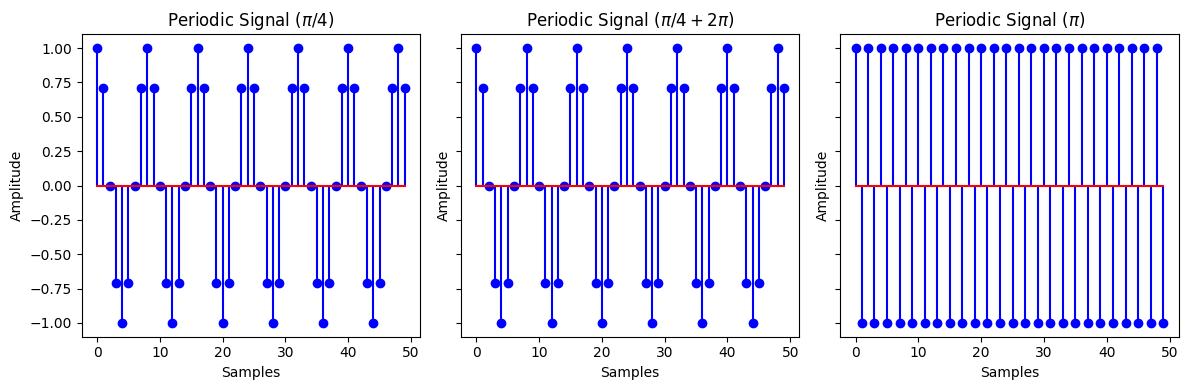

In [95]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)

axs[0].stem(samples3, periodic_exp1, linefmt='b-', markerfmt='bo', basefmt='r-')
axs[0].set_title('Periodic Signal ($\pi / 4$)')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')

axs[1].stem(samples3, periodic_exp2, linefmt='b-', markerfmt='bo', basefmt='r-')
axs[1].set_title('Periodic Signal ($\pi / 4 + 2\pi$)')
axs[1].set_xlabel('Samples')
axs[1].set_ylabel('Amplitude')

axs[2].stem(samples3, periodic_exp3, linefmt='b-', markerfmt='bo', basefmt='r-')
axs[2].set_title('Periodic Signal ($\pi$)')
axs[2].set_xlabel('Samples')
axs[2].set_ylabel('Amplitude')


fig.tight_layout()
plt.show()

A partir dos dois primeiros gráficos, é notável que o aumento da frequência angular não representa necessariamente um aumento na oscilação pois aumenta-se a frequência em $2\pi$ e a oscilação continua a mesma. Esse valor representa uma espécie de ciclo na variação de sinais complexos periódicos. Pelo terceiro gráfico, vemos que o sinal oscila mais rápido para $w_0 = \pi$, o que também vemos na equação $\exp{j \pi n} = (\exp{j \pi})^n = (-1)^n$.

**Exercício 04**: Duas funções importantes para o estudo de sinais é a função impulso unitário e a função degrau unitário. É possível chegar de uma função na outra como visto em aula. Implemente a função degrau a partir da função impulso (soma acumulativa), e função impulso a partir da função degrau (primeira diferença). Além disso, faça uma onda quadrada a partir da função degrau que foi implementada. Plote os gráficos.

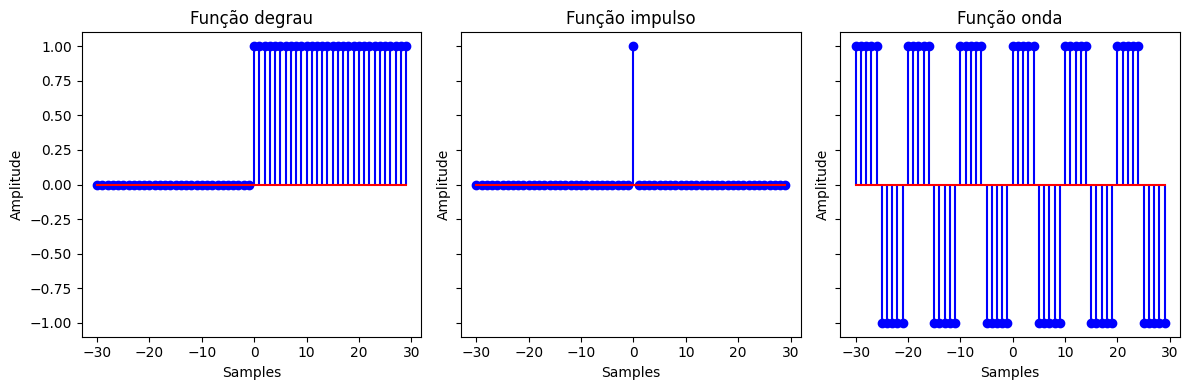

In [278]:
# Função impulso
def impulso(m, n = 0):

  r = np.arange(-m, m)
  imp = np.zeros(len(r))

  for i in r:
    imp[np.where(r == i)] = 1 if i == n else 0

  return imp

# Função degrau
def degrau(m, n = 0):

  r = np.arange(-m, m)
  deg = np.zeros(len(r))

  for i in r:
    deg[np.where(r == i)] = 1 if i >= n else 0

  return deg

# Função degrau a partir da função impulso
def degrau_imp(m, n=0):
    r = np.arange(-m, m)
    deg_imp = np.zeros(len(r))

    for i in range(n, m):
        deg_imp += impulso(m, i) # Usa a soma cumulativa deslocando a função impulso

    return deg_imp

# Função impulso a partir da função degrau
def impulso_deg(m, n = 0):

  imp_deg = degrau(m) - degrau(m, 1) # Usa a primeira diferença deslocando a função degrau em 1

  return imp_deg

# Função onda a partir da função degrau
def onda(m, s):

  onda = np.zeros(len(np.arange(-m, m)))

  for i in range(0, len(onda), s):

    onda += (2 if i > 0 else 1) * (-1)**i * degrau_imp(m, -m + i) # Desloca a função degrau de acordo com o passo s, variando de 1 a -1

  return onda

m = 30 # Número de amostras

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)

axs[0].stem(np.arange(-m, m), degrau_imp(m, 0), linefmt='b-', markerfmt='bo', basefmt='r-')
axs[0].set_title('Função degrau')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')

axs[1].stem(np.arange(-m, m), impulso_deg(m, 0), linefmt='b-', markerfmt='bo', basefmt='r-')
axs[1].set_title('Função impulso')
axs[1].set_xlabel('Samples')
axs[1].set_ylabel('Amplitude')

axs[2].stem(np.arange(-m, m), onda(m, 5), linefmt='b-', markerfmt='bo', basefmt='r-')
axs[2].set_title('Função onda')
axs[2].set_xlabel('Samples')
axs[2].set_ylabel('Amplitude')

fig.tight_layout()
plt.show()

**Exercício 05**: Uma imagem pode ser pensada como um sinal com duas variáveis independentes que, ao invés de ser o tempo, são as dimensões (vertical e horizontal), ou seja, $x[n_V, n_H]$. Utilizando a imagem (image.jpeg) disponibilizada no SIGAA, faça:

1. $x[−n_V , n_H ]$.
2. $x[n_V , −n_H ]$.
3. $x[n_V − n_0, n_H ]$, $\quad n0 ∈ Z$.
4. $x[n_V , n_H − n_1]$, $\quad n1 ∈ Z$.
5. $x[n_V − n_2, n_H − n_3]$, $\quad n2, n3 ∈ Z$

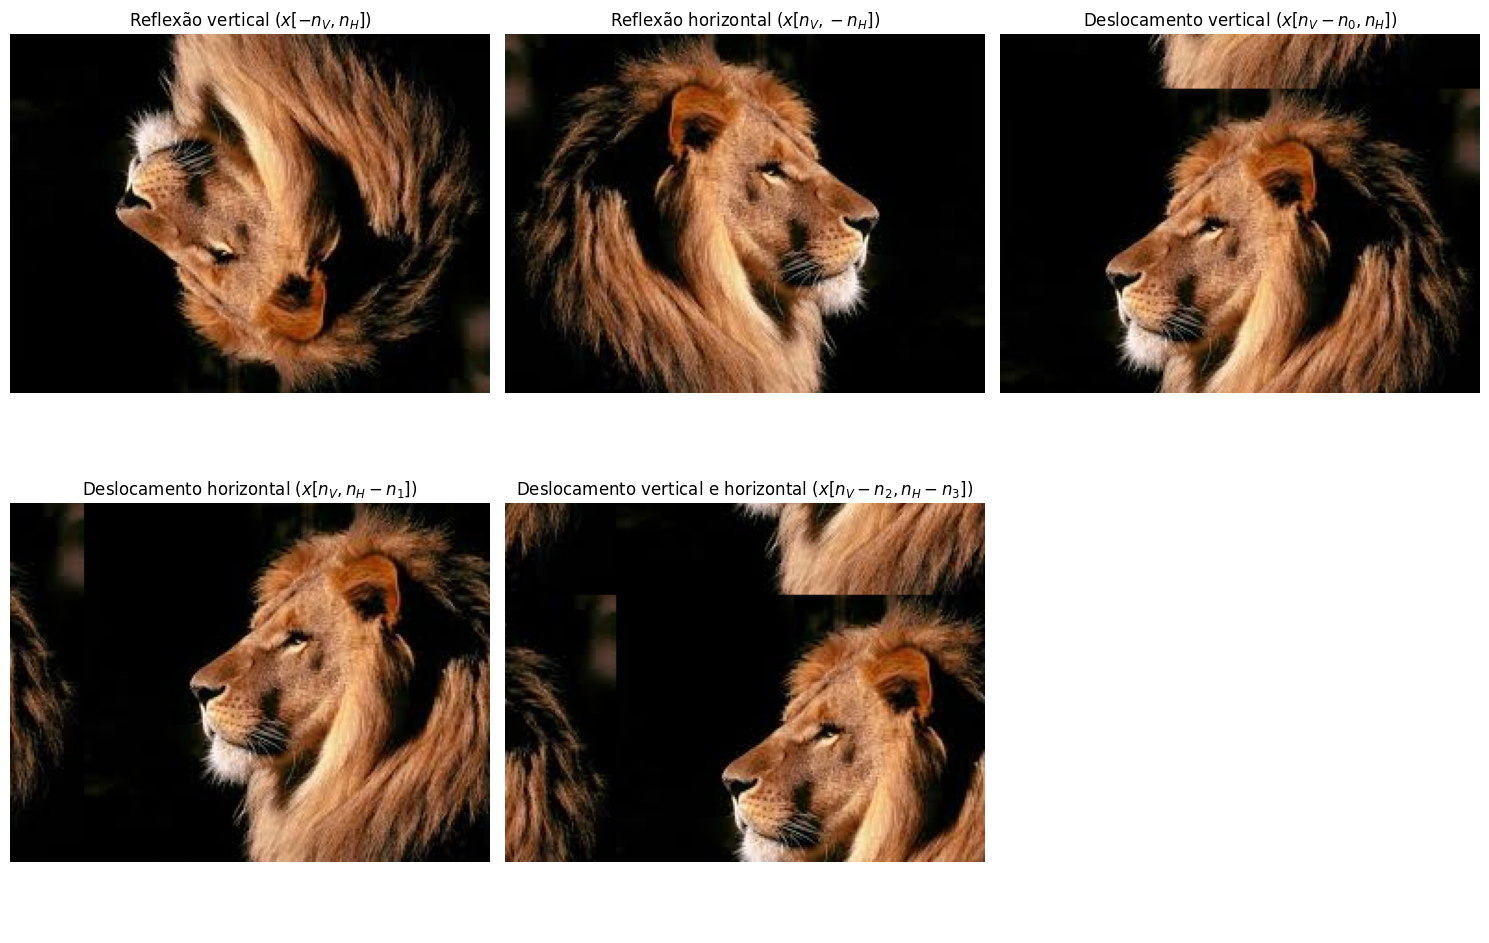

In [7]:
from PIL import Image

im = Image.open('/image.jpg') # Importa a imagem

imv_reflex = np.flipud(im) # Reflete verticalmente tal qual o valor da dimensão vertical sendo negativo
imh_reflex = np.fliplr(im) # Reflete horizontalmente tal qual o valor da dimensão horizontal sendo negativo

n0, n1, n2, n3 = 30, 40, 50, 60

imv_desloc = np.roll(im, n0, axis=0) # Desloca verticalmente em n0 pixels
imh_desloc = np.roll(im, n1, axis=1) # Desloca horizontalmente em n1 pixels
imvh_desloc = np.roll(im, (n2, n3), axis=(0, 1)) # Desloca verticalmente em n2 pixels e horizontalmente em n3 pixels


fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].imshow(imv_reflex)
axs[0, 0].set_title("Reflexão vertical ($x[−n_V , n_H ]$)")
axs[0, 0].axis('off')

axs[0, 1].imshow(imh_reflex)
axs[0, 1].set_title("Reflexão horizontal ($x[n_V , −n_H ]$)")
axs[0, 1].axis('off')

axs[0, 2].imshow(imv_desloc)
axs[0, 2].set_title("Deslocamento vertical ($x[n_V − n_0, n_H ]$)")
axs[0, 2].axis('off')

axs[1, 0].imshow(imh_desloc)
axs[1, 0].set_title("Deslocamento horizontal ($x[n_V , n_H − n_1]$)")
axs[1, 0].axis('off')

axs[1, 1].imshow(imvh_desloc)
axs[1, 1].set_title("Deslocamento vertical e horizontal ($x[n_V − n_2, n_H − n_3]$)")
axs[1, 1].axis('off')

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

**Exercício 06**: Considerando $x[n]$ um sinal contendo as $N$ amostras $(n = {0, 1, ..., N − 1})$
ruidosas de um sinal $x(t) = f (t)u(t)$, onde

$$
f(t) = 0.75e^{−0.275t} (4 cos(4t + \pi/3) + 5sin(t)), \quad t ∈ [0, 10] s
$$

presentes no arquivo (samples.csv) disponibilizado no SIGAA, obtenha $y[n]$ para os sistemas representados pelas seguintes relações de entrada e saída:

1. $y[n] = y[n − 1] + x[n]$, respeitando a condição inicial $y[−1] = 0$.
2. $y[n] = \frac{1}{2M + 1} \sum_{k = -M}^{M} x[n - k]$, onde $M < N ∈ \mathbf{N} $ é o parâmetro que deve ser ajustado de modo a “eliminar” o ruído presente no sinal.

Para cada caso, plote os sinais $x[n]$ e $y[n]$, comentando os resultados obtidos. Qual valor de $M$ que melhor ajusta o sinal?

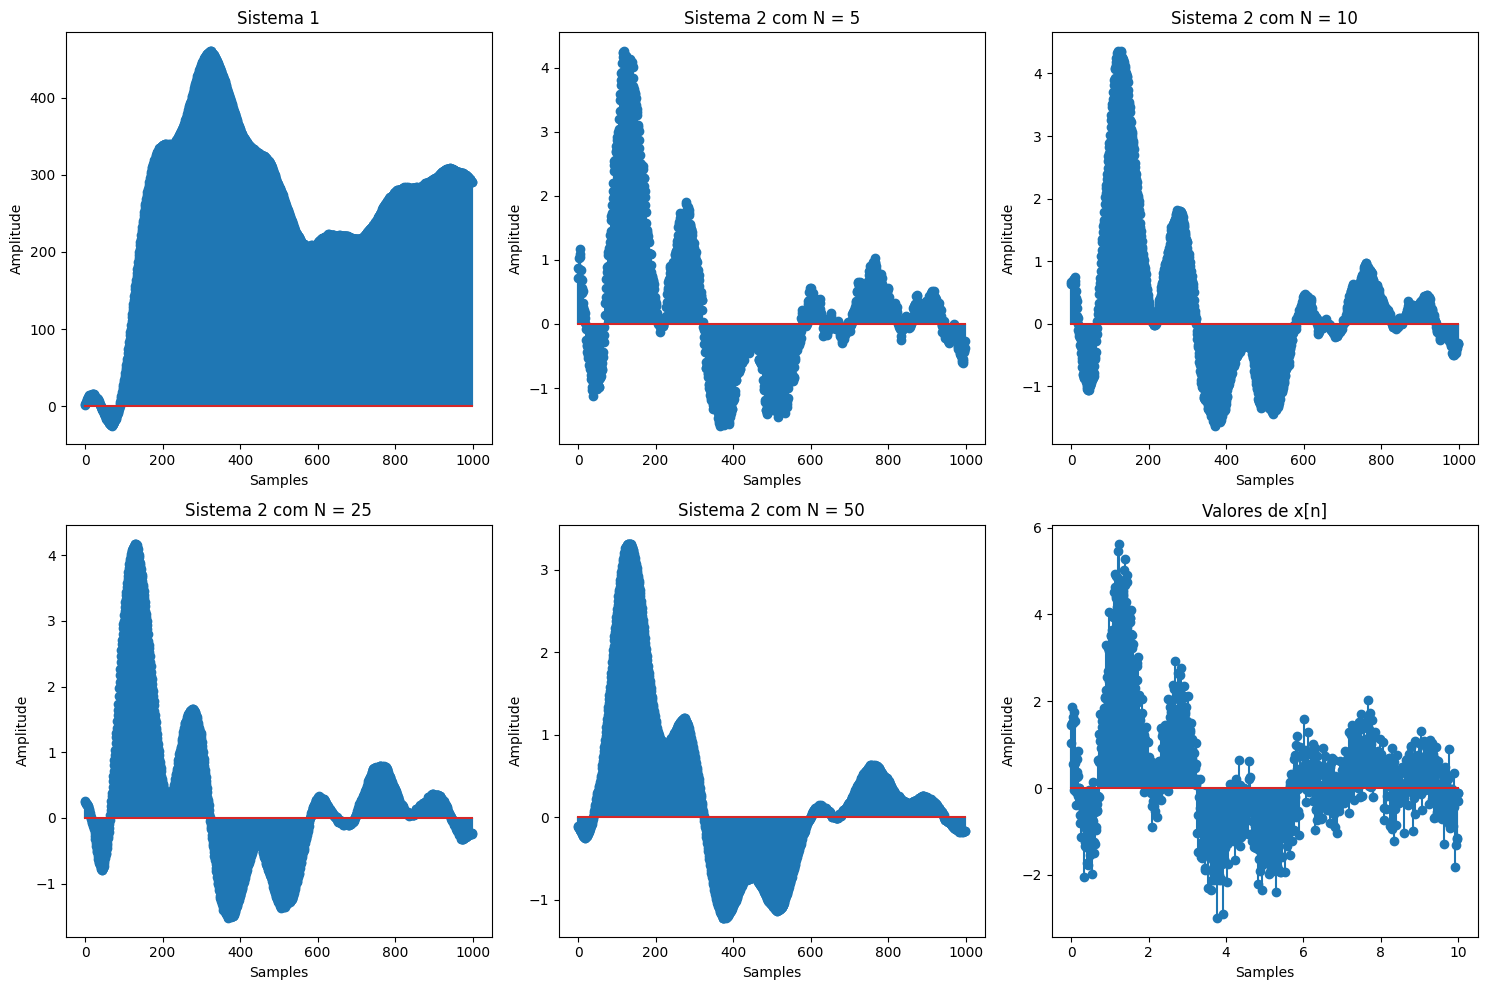

In [5]:
import pandas as pd

data = pd.read_csv('/samples.csv') # Acessa os dados

N = 1000

# Sistema 1
sistema1 = np.zeros(N)

for n in range(N):

  if n == 0:
    sistema1[n] = data['x_n'][n] # Define a posição 0 considerando y[-1] = 0

  else:
    sistema1[n] = sistema1[n - 1] + data['x_n'][n] # Define as demais posições de acordo com a fórmula


# Sistema 2 para M = 5
sistema2_5 = np.zeros(N)
M = 5

for n5 in range(N):

  sistema2_5[n5] = 0

  limites_soma = np.arange(-M, M)

  for k in limites_soma:

    # Só considera valores entre 0 e 999 pois só há valores de x[n] nesse intervalo
    if n5 - k < 0:
      sistema2_5[n5] += 0
    elif n5 - k > 999:
      sistema2_5[n5] += 0

    else:
      sistema2_5[n5] += data['x_n'][n5 - k] # Faz o somatório dos valores próximos considerando o intervalo (-M, M)

  sistema2_5[n5] = (1 / (2*M + 1)) * sistema2_5[n5] # Tira a média desses valores


# Sistema 2 para M = 10
sistema2_10 = np.zeros(N)
M = 10

for n10 in range(N):

  sistema2_10[n10] = 0

  limites_soma = np.arange(-M, M)

  for k in limites_soma:

    if n10 - k < 0:
      sistema2_10[n10] += 0
    elif n10 - k > 999:
      sistema2_10[n10] += 0

    else:
      sistema2_10[n10] += data['x_n'][n10 - k]

  sistema2_10[n10] = (1 / (2*M + 1)) * sistema2_10[n10]


# Sistema 2 para M = 25
sistema2_25 = np.zeros(N)
M = 25

for n25 in range(N):

  sistema2_25[n25] = 0

  limites_soma = np.arange(-M, M)

  for k in limites_soma:

    if n25 - k < 0:
      sistema2_25[n25] += 0
    elif n25 - k > 999:
      sistema2_25[n25] += 0

    else:
      sistema2_25[n25] += data['x_n'][n25 - k]

  sistema2_25[n25] = (1 / (2*M + 1)) * sistema2_25[n25]


# Sistema 2 para M = 50
sistema2_50 = np.zeros(N)
M = 50

for n50 in range(N):

  sistema2_50[n50] = 0

  limites_soma = np.arange(-M, M)

  for k in limites_soma:

    if n50 - k < 0:
      sistema2_50[n50] += 0
    elif n50 - k > 999:
      sistema2_50[n50] += 0
    else:
      sistema2_50[n50] += data['x_n'][n50 - k]

  sistema2_50[n50] = (1 / (2*M + 1)) * sistema2_50[n50]


fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].stem(np.arange(0, N), sistema1)
axs[0, 0].set_title("Sistema 1")
axs[0, 0].set_xlabel('Samples')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].stem(np.arange(0, N), sistema2_5)
axs[0, 1].set_title("Sistema 2 com N = 5")
axs[0, 1].set_xlabel('Samples')
axs[0, 1].set_ylabel('Amplitude')

axs[0, 2].stem(np.arange(0, N), sistema2_10)
axs[0, 2].set_title("Sistema 2 com N = 10")
axs[0, 2].set_xlabel('Samples')
axs[0, 2].set_ylabel('Amplitude')

axs[1, 0].stem(np.arange(0, N), sistema2_25)
axs[1, 0].set_title("Sistema 2 com N = 25")
axs[1, 0].set_xlabel('Samples')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].stem(np.arange(0, N), sistema2_50)
axs[1, 1].set_title("Sistema 2 com N = 50")
axs[1, 1].set_xlabel('Samples')
axs[1, 1].set_ylabel('Amplitude')

axs[1, 2].stem(data['t_n'], data['x_n'])
axs[1, 2].set_title("Valores de x[n]")
axs[1, 2].set_xlabel('Samples')
axs[1, 2].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

O sistema 1 apresentou um resultado muito diferente dos valores de $x[n]$. O sistema 2, que representa uma média móvel apresentou resultados de forma bem semelhante ao sinal que foi amostrado, tendo melhores resultados para M menores, como pode-se perceber nos diferentes gráficos mostrados. De certa forma há uma deformação ao aumentar-se o valor de M.